<a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://user-images.githubusercontent.com/26833433/82952157-51b7db00-9f5d-11ea-8f4b-dda1ffecf992.jpg">

This notebook was written by Ultralytics LLC, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://www.ultralytics.com.

# Setup

Clone repo, install dependencies, `%cd` into `./yolov5` folder and check GPU.

In [4]:


import torch
from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.7.0 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


# 1. Inference

Run inference with a pretrained checkpoint on contents of `/inference/images` folder. Models are auto-downloaded from [Google Drive](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J).

In [2]:
!python detect.py --weights runs/exp23/weights/best.pt  --conf 0.5 --source ../datasets/cleancoolingTowers_negsamples//images/train


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', img_size=640, iou_thres=0.45, save_conf=False, save_dir='inference/output', save_txt=False, source='../datasets/cleancoolingTowers_negsamples//images/train', update=False, view_img=False, weights=['runs/exp23/weights/best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Fusing layers... 
Model Summary: 236 layers, 4.73647e+07 parameters, 0 gradients
image 1/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000000.jpg: False
None
640x640 Done. (0.050s)
image 2/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000001.jpg: False
None
640x640 Done. (0.052s)
image 3/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000002.jpg: False
None
640x640 1 coolingTowers, Done. (0.057s)
image 4/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000003.jpg: False
None
640x640 Done. (0.0

image 60/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000059.jpg: False
None
640x640 Done. (0.041s)
image 61/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000060.jpg: False
None
640x640 Done. (0.047s)
image 62/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000061.jpg: False
None
640x640 2 coolingTowers, Done. (0.054s)
image 63/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000062.jpg: False
None
640x640 Done. (0.051s)
image 64/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000063.jpg: False
None
640x640 Done. (0.050s)
image 65/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000064.jpg: False
None
640x640 Done. (0.049s)
image 66/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000065.jpg: False
None
640x640 2 coolingTowers, Done. (0.057s)
image 67/5276 /home/m.esguerra/datasets/cleancoolingTowers_negs

640x640 Done. (0.026s)
image 122/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000121.jpg: False
None
640x640 Done. (0.046s)
image 123/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000122.jpg: False
None
640x640 Done. (0.049s)
image 124/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000123.jpg: False
None
640x640 Done. (0.049s)
image 125/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000124.jpg: False
None
640x640 1 coolingTowers, Done. (0.057s)
image 126/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000125.jpg: False
None
640x640 Done. (0.051s)
image 127/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000126.jpg: False
None
640x640 Done. (0.050s)
image 128/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000127.jpg: False
None
640x640 Done. (0.049s)
image 129/5276 /home/m.esguerra/datasets/cleancool

640x640 2 coolingTowers, Done. (0.057s)
image 183/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000182.jpg: False
None
640x640 Done. (0.052s)
image 184/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000183.jpg: False
None
640x640 Done. (0.050s)
image 185/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000184.jpg: False
None
640x640 Done. (0.046s)
image 186/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000185.jpg: False
None
640x640 5 coolingTowers, Done. (0.057s)
image 187/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000186.jpg: False
None
640x640 2 coolingTowers, Done. (0.057s)
image 188/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000187.jpg: False
None
640x640 Done. (0.051s)
image 189/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000188.jpg: False
None
640x640 Done. (0.041s)
image 190/5276 /

image 244/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000243.jpg: False
None
640x640 Done. (0.047s)
image 245/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000244.jpg: False
None
640x640 Done. (0.050s)
image 246/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000245.jpg: False
None
640x640 Done. (0.050s)
image 247/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000246.jpg: False
None
640x640 Done. (0.050s)
image 248/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000247.jpg: False
None
640x640 Done. (0.050s)
image 249/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000248.jpg: False
None
640x640 Done. (0.051s)
image 250/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000249.jpg: False
None
640x640 Done. (0.049s)
image 251/5276 /home/m.esguerra/datasets/cleancoolingTowers_negsamples/images/train/000250

Inference can be run on a variety of sources: images, videos, directories, webcams, rtsp and http streams as shown in the example below.

# 2. Test
Test a model on COCO val or test-dev dataset to determine trained accuracy. Models are auto-downloaded from [Google Drive](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J). To show results by class use the `--verbose` flag. Note that `pycocotools` metrics may be 1-2% better than the equivalent repo metrics, as is visible below, due to slight differences in mAP computation.

### 2.1 val2017
Download COCO val 2017 dataset, 1GB, 5000 images, and test model accuracy.

In [ ]:
# Download COCO val2017
gdrive_download('1Y6Kou6kEB0ZEMCCpJSKStCor4KAReE43','coco2017val.zip')  # val2017 dataset
!mv ./coco ../  # move folder alongside /yolov5

In [ ]:
# Run YOLOv5x on COCO val2017
!python test.py --weights yolov5x.pt --data coco.yaml --img 672

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/coco.yaml', device='', img_size=672, iou_thres=0.65, merge=False, save_json=True, single_cls=False, task='val', verbose=False, weights=['yolov5x.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Fusing layers... Model Summary: 284 layers, 8.89222e+07 parameters, 8.89222e+07 gradients
Scanning labels ../coco/labels/val2017.cache (4952 found, 0 missing, 48 empty, 0 duplicate, for 5000 images): 100% 5000/5000 [00:00<00:00, 22899.17it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 157/157 [02:38<00:00,  1.01s/it]
                 all       5e+03    3.63e+04       0.426       0.746        0.66       0.469
Speed: 22.3/1.7/24.0 ms inference/NMS/total per 672x672 image at batch-size 32

COCO mAP with pycocotools... saving detections_val2017__results.json...
loading annotations into memory...
Done (t=0.41s)
creating index...
index cre

### 2.2 test-dev2017
Download COCO test2017 dataset, 7GB, 40,000 images, to test model accuracy on test-dev set, 20,000 images. Results are saved to a `*.json` file which can be submitted to the evaluation server at https://competitions.codalab.org/competitions/20794.

In [ ]:
# Download COCO test-dev2017
gdrive_download('1cXZR_ckHki6nddOmcysCuuJFM--T-Q6L','coco2017labels.zip')  # annotations
!f="test2017.zip" && curl http://images.cocodataset.org/zips/$f -o $f && unzip -q $f && rm $f  # 7GB,  41k images
!mv ./test2017 ./coco/images && mv ./coco ../  # move images into /coco and move /coco alongside /yolov5

# 3. Train

Download https://www.kaggle.com/ultralytics/coco128, a small 128-image tutorial dataset, start tensorboard and train YOLOv5s from a pretrained checkpoint for 3 epochs (actual training is much longer, around **300-1000 epochs**, depending on your dataset).

In [ ]:
# Download coco128
gdrive_download('1n_oKgR81BJtqk75b00eAjdv03qVCQn2f','coco128.zip')  # coco128 dataset
!mv ./coco128 ../  # move folder alongside /yolov5

Train a YOLOv5s model on coco128 by specifying model config file `--cfg models/yolo5s.yaml`, and dataset config file `--data data/coco128.yaml`. Start training from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights ''`. Pretrained weights are auto-downloaded from [Google Drive](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J).

**All training results are saved to `runs/exp0`** for the first experiment, then `runs/exp1`, `runs/exp2` etc. for subsequent experiments.


In [ ]:
# Start tensorboard (optional)
%load_ext tensorboard
%tensorboard --logdir runs

# 4. Visualize

View `runs/exp0/train*.jpg` images to see training images, labels and augmentation effects. A **Mosaic Dataloader** is used for training (shown below), a new concept developed by Ultralytics and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

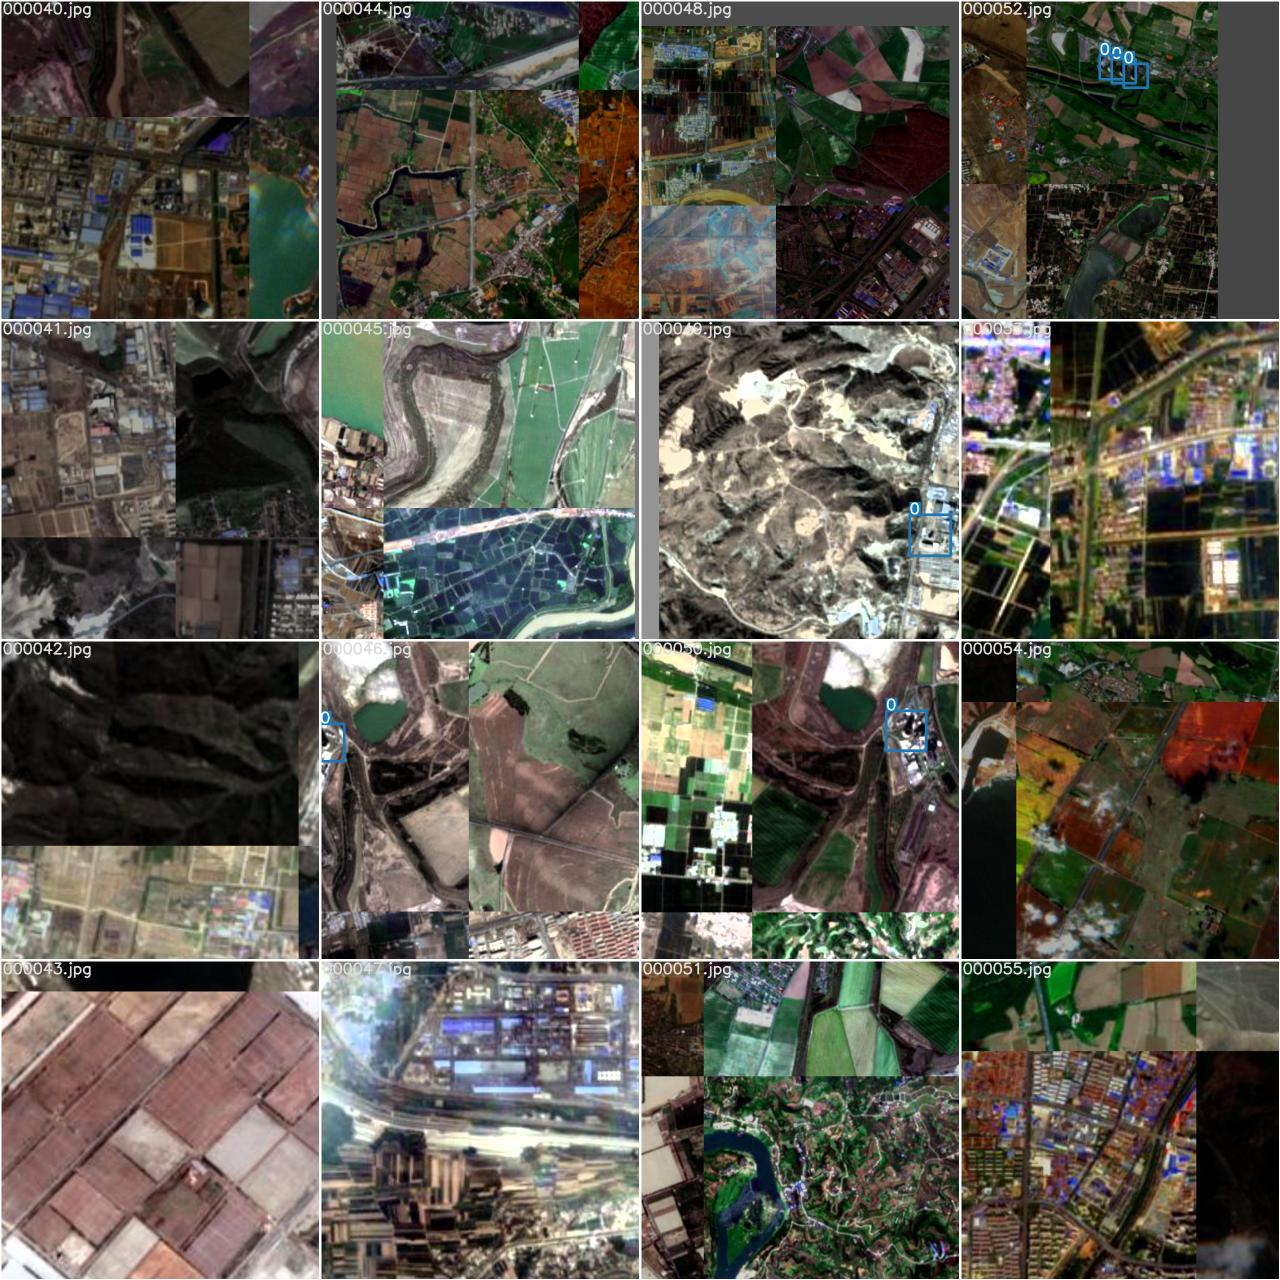

In [7]:
Image(filename='runs/exp23/train_batch2.jpg', width=900)  # view augmented training mosaics

View `test_batch0_gt.jpg` to see test batch 0 *ground truth* labels.

View `test_batch0_pred.jpg` to see test batch 0 *predictions*.

Training losses and performance metrics are saved to Tensorboard and also to a `runs/exp0/results.txt` logfile. `results.txt` is plotted as `results.png` after training completes. Partially completed `results.txt` files can be plotted with `from utils.general import plot_results; plot_results()`. Here we show YOLOv5s trained on coco128 to 300 epochs, starting from scratch (blue), and from pretrained `yolov5s.pt` (orange).

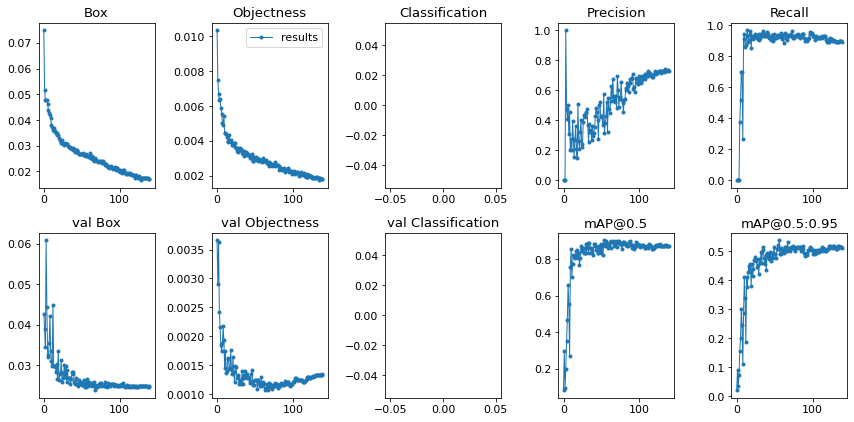

In [8]:
from utils.general import plot_results; plot_results(save_dir='runs/exp23/')  # plot results.txt files as results.png